In [1]:
import numpy as np
import pandas as pd
import sys
import warnings
from functions import *
warnings.filterwarnings("ignore")

# for reproducibility
np.random.seed(123)

# print full arrays/dataframes for debugging
np.set_printoptions(threshold=sys.maxsize)

# names of columns extracted.
# note we are not using filenames right now, will need to look at that
# for unique identifier because of inode reuse
feat_cols = ["inode", "pid", "ppid", "uid", "euid", "gid", "egid"]

# import (a single file at the moment) into numpy array
datanp = np.genfromtxt('./ima/20200116.dat',
                       dtype=None,
                       delimiter=' ',
                       usecols=(5, 7, 8, 9, 10, 11, 12))

# convert data to pandas dataframe
datapd = pd.DataFrame(data=datanp,
                      columns=feat_cols)


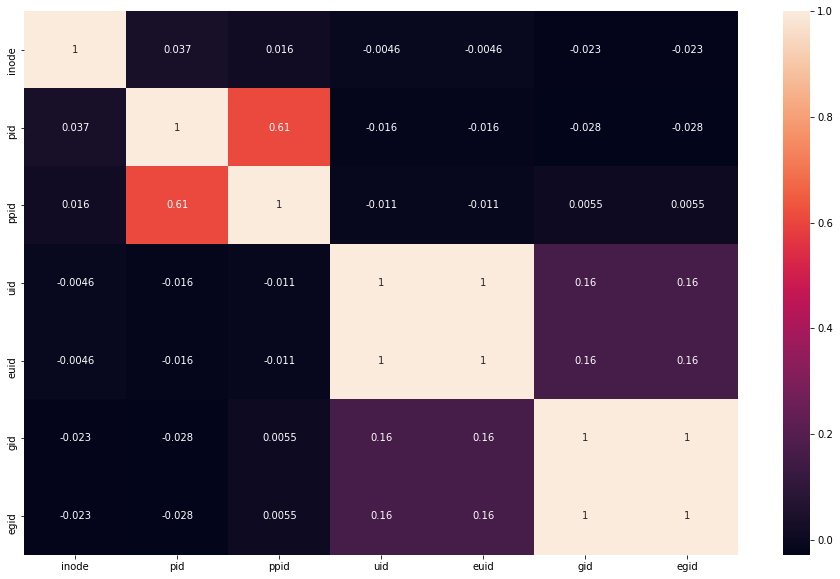

In [2]:
# reduce dimensions with high correlation filter
# drawmap=1 to see heatmap for justification
datapd, red_cols = high_corr_filter(df=datapd,
                                    drawmap=1)

Explained variation per principal component:[9.99332670e-01 5.12264642e-04 1.22517236e-04]
showing plot...


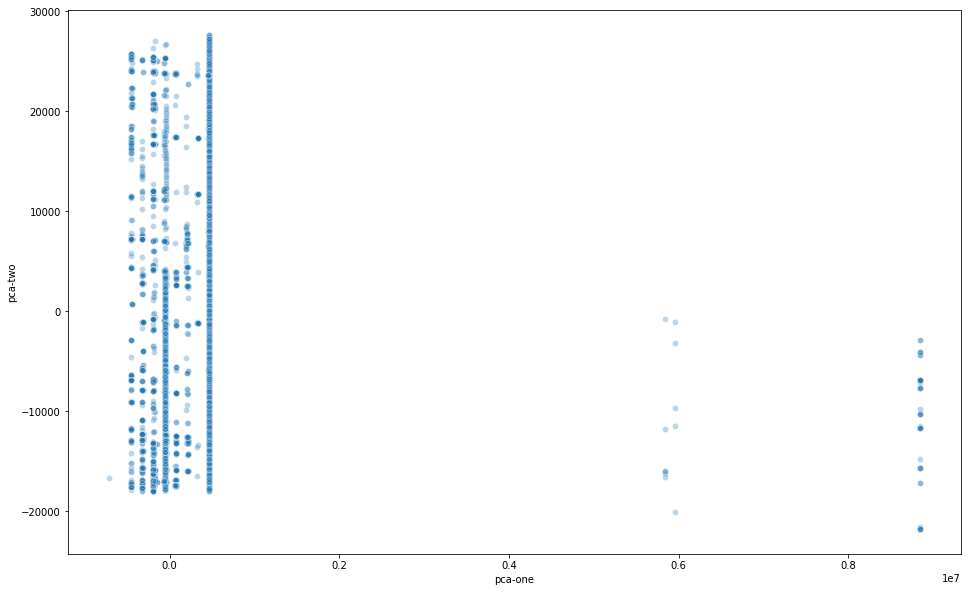

In [3]:
# reduce dimensions using PCA
data_pca = func_pca(df=datapd,
                  drawplot=1)

Estimated number of clusters: 6
Estimated number of noise points: 14335


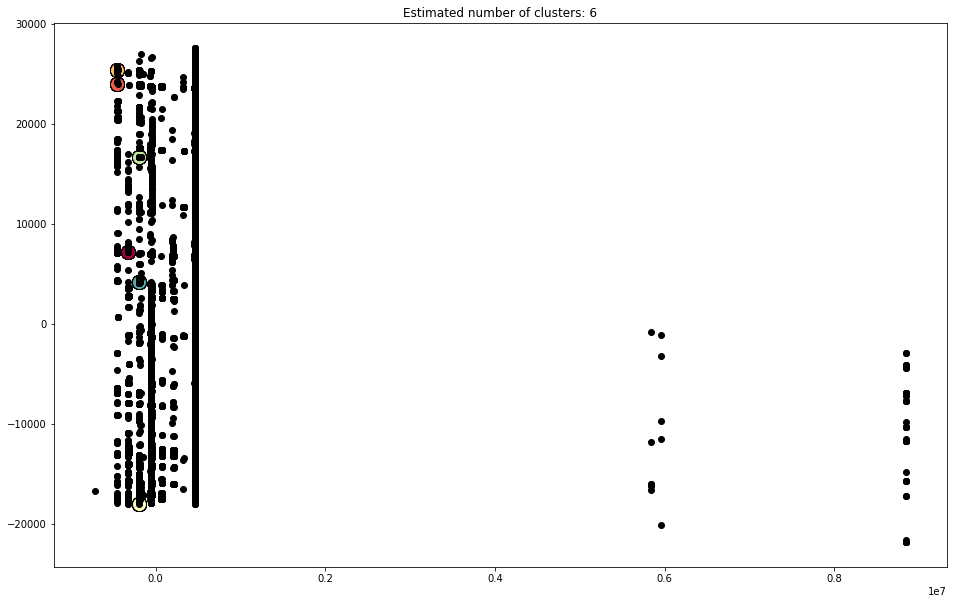

In [8]:
# convert dataframe back to numpy and perform 2D DBSCAN  (((PCA)))
data_pca_for_dbscan = data_pca.to_numpy()
func_dbscan(data=data_pca_for_dbscan[:, [5, 6]],
           eps=0.4,
           min_samples=7,
           drawplot=1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14479 samples in 0.013s...
[t-SNE] Computed neighbors for 14479 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14479
[t-SNE] Computed conditional probabilities for sample 2000 / 14479
[t-SNE] Computed conditional probabilities for sample 3000 / 14479
[t-SNE] Computed conditional probabilities for sample 4000 / 14479
[t-SNE] Computed conditional probabilities for sample 5000 / 14479
[t-SNE] Computed conditional probabilities for sample 6000 / 14479
[t-SNE] Computed conditional probabilities for sample 7000 / 14479
[t-SNE] Computed conditional probabilities for sample 8000 / 14479
[t-SNE] Computed conditional probabilities for sample 9000 / 14479
[t-SNE] Computed conditional probabilities for sample 10000 / 14479
[t-SNE] Computed conditional probabilities for sample 11000 / 14479
[t-SNE] Computed conditional probabilities for sample 12000 / 14479
[t-SNE] Computed conditional probabilities for sa

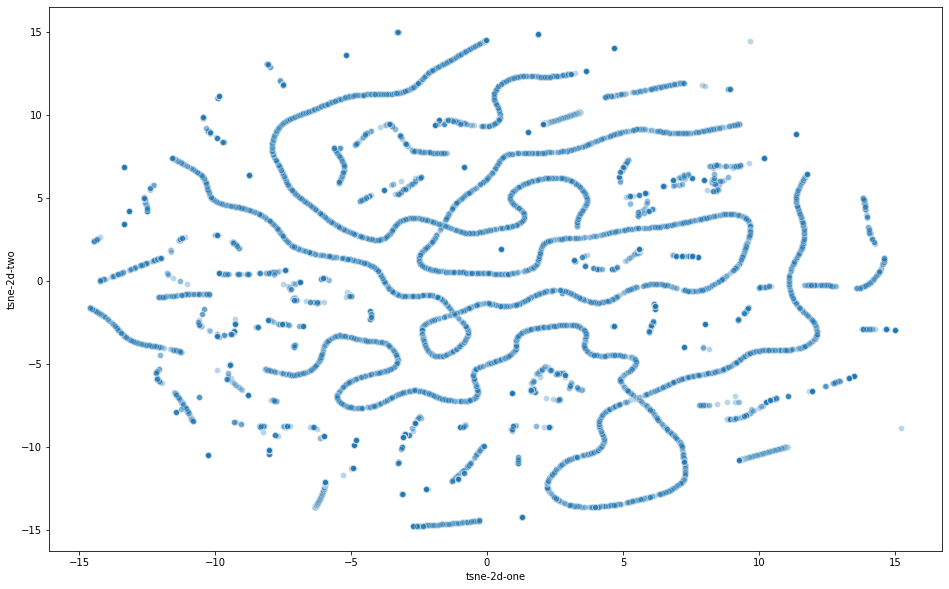

In [7]:
# reduce dimensions using tSNE (to 2 dimensions)
data_tsne = func_tsne(df=datapd,
                   drawplot=1)

Estimated number of clusters: 110
Estimated number of noise points: 39


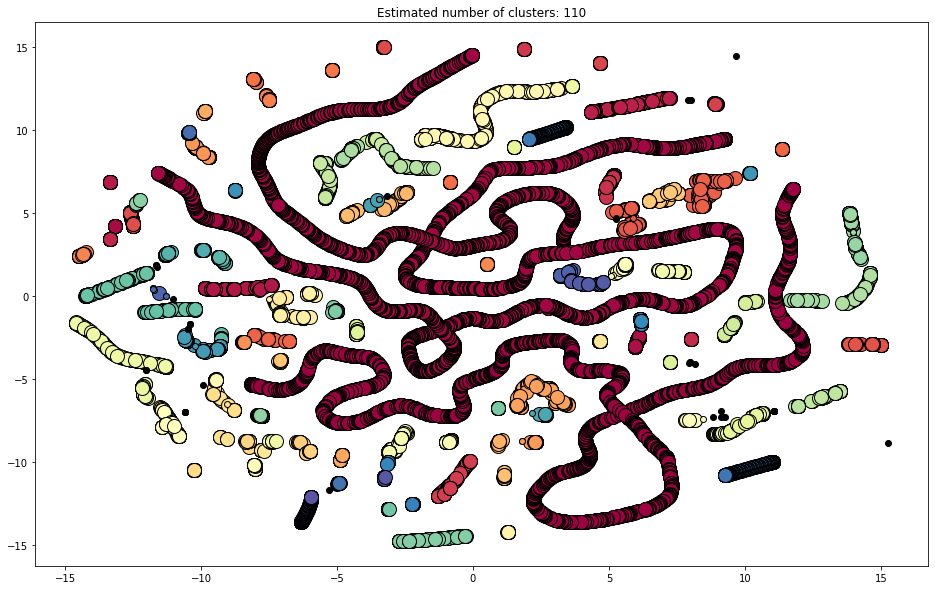

In [8]:
# convert dataframe back to numpy and perform 2D DBSCAN (((tSNE)))
data_tsne_for_dbscan = data_tsne.to_numpy()
func_dbscan(data=data_tsne_for_dbscan[:, [5, 6]],
            eps=0.4,
            min_samples=7)